# Metrics Research

## Hypothesis Testing

The general framework of hypothesis testing as applied to backtesting follows these steps:

1. Based on a backtest on some finite sample of data, we compute a certain statistical measure called the **test statistic**.


2. We suppose that t-statistic based on an infinite data set is actually zero.This supposition is called the null hypothesis.


3. We suppose that the probability distribution of daily returns is known. This probability distribution has a zero mean, based on the null hypothesis. We describe later how we determine this probability distribution.


4. Based on this null hypothesis probability distribution, we compute the probability p that the t-statistic will be at least as extreme (allowing for the possibility of a negative test statistic). This probability p is called the **p-value**, and if it is very small (let’s say smaller than 0.01), that means we can “reject the null hypothesis,” and conclude that the backtested average daily return is statistically significant.

## Determining the Probability Distribution Under Null Hypothesis

### Gaussian Distribution

Suppose that the daily returns follow a Gaussian distribution, with a mean of zero and a standard deviation given by the sample standard deviation of the t-statistic. 


If we do this, it is clear that if the backtest has a high Sharpe ratio, it would be very easy for us to reject the null hypothesis. This is because the standard test statistic for a Gaussian distribution is none other than the average divided by the standard deviation and multiplied by the square root of the number of data points 

(basically fancy way of saying the sharpe ratio lmao)

| p-value         | 0.1   | 0.05  | 0.01  | 0.001 |
|-----------------|-------|-------|-------|-------|
| Critical Values | 1.282 | 1.645 | 2.326 | 3.091 |

### Monte Carlo Simulation

Another method is to use Monte Carlo methods to generate simulated historical price data and feed these simulated data into our strategy to determine the empirical probability distribution of profits.


Our belief is that the profitability of the trading strategy captured some subtle patterns or correlations of the price series, and not just because of the first few moments of the price distributions.


So if we generate many simulated price series with the same first moments and the same length as the actual price data, and run the trading strategy over all these simulated price series, we can find out in what fraction p of these price series are the average returns greater than or equal to the backtest return.

### Simulated Trades Method

In this method, instead of generating simulated price data, we generate sets of simulated trades, with the constraint that the number of long and short entry trades is the same as in the backtest, and with the same average holding period for the trades. 

These trades are distributed randomly over the actual historical price series. We then measure what fraction of such sets of trades has average return greater than or equal to the backtest average return.

## Options for T-Statistic

- Returns
    - Cumulative Returns
    - Average Daily Returns
    
    
- Drawdown
    - Maximum Drawdown Length
    - Number of Drawdowns > 1 Week


- Losses
    - Number of 15% Losses
    - Biggest Loss
    
**OR Some Combination of the Above.**

# Hypothesis Tests

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import time
# from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

## Gaussian

### Average Daily Returns

In [56]:
daily_returns = pd.read_csv('../data/returnss2.csv')

In [39]:
ret = daily_returns['0'].to_list()

In [40]:
# we multiply by the sqrt(len(ret)) to "annualize" the sharpe ratio based on big brain maths
sharpe = np.sqrt(len(ret)) * np.nanmean(ret) / np.nanstd(ret)
print("Gaussian Test statistic = %f" % sharpe)

Gaussian Test statistic = 4.707045


| p-value         | 0.1   | 0.05  | 0.01  | 0.001 |
|-----------------|-------|-------|-------|-------|
| Critical Values | 1.282 | 1.645 | 2.326 | 3.091 |

In [23]:
df1 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-4500.csv')
df2 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-4750.csv')
df3 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-5000.csv')
df4 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-5250.csv')
df5 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-5500.csv')
# df6 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-4000.csv')
# df7 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-5000.csv')
# df8 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-6000.csv')
# df9 = pd.read_csv('../data/generated/ARDRUSDT-LSKUSDT-8000.csv')

In [27]:
bigdf = pd.concat([df1, df2, df3, df4]) #df5, df6, df7
df1 = None
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None
df7 = None
df8 = None
df9 = None

In [28]:
bigdf

,lookback,thres,sell_thres,cusum,returns,drawdowns
0,4500,3.2,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13594, 0.00748, -0.07305, -0.02474, 0.04631...","[10115580, 204660, 282360, 349500, 301980, 237..."
1,4500,3.2,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.17387, 0.01452, -0.07264, -0.02162, 0.05117...","[9460320, 204600, 398160, 301680, 300780, 2391..."
2,4500,3.2,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.10282, 0.01452, -0.06946, -0.01994, 0.053, ...","[9444540, 204420, 174660, 2314080, 922920, 113..."
3,4500,3.2,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0698, 0.01452, -0.06946, -0.01886, 0.053, 0...","[9661440, 197160, 316740, 282600, 2310120, 113..."
4,4500,3.2,0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.07462, 0.01452, -0.07963, -0.01797, -0.0605...","[9646380, 197040, 1157880, 2301960, 710940, 12..."
...,...,...,...,...,...,...
40,5250,4.8,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.06277, 0.06981, -0.00115, 0.05714, 0.03415...","[4640340, 1605900, 401940, 788340, 2666880, 88..."
41,5250,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05936, 0.07363, -0.00115, 0.0649, 0.04707,...","[4639920, 1622280, 340080, 788220, 2658540, 88..."
42,5250,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0791, 0.09238, -0.01193, 0.07014, 0.04707,...","[4626480, 1622280, 337260, 788220, 2657880, 86..."
43,5250,4.8,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.07051, 0.09238, -0.01193, 0.07014, 0.04903...","[4624920, 1622280, 216840, 552300, 2656140, 10..."


In [29]:
bigdf.isnull().any()

lookback      False
thres         False
sell_thres    False
cusum         False
returns       False
drawdowns     False
dtype: bool

In [30]:
start = time.time()

bigdf["cusum"] = bigdf["cusum"].apply(eval)
bigdf["returns"] = bigdf["returns"].apply(eval)
bigdf["drawdowns"] = bigdf["drawdowns"].apply(eval)

time.time() - start

522.829530954361

In [32]:
bigdf

,lookback,thres,sell_thres,cusum,returns,drawdowns
0,4500,3.2,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13594, 0.00748, -0.07305, -0.02474, 0.04631...","[10115580, 204660, 282360, 349500, 301980, 237..."
1,4500,3.2,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.17387, 0.01452, -0.07264, -0.02162, 0.05117...","[9460320, 204600, 398160, 301680, 300780, 2391..."
2,4500,3.2,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.10282, 0.01452, -0.06946, -0.01994, 0.053, ...","[9444540, 204420, 174660, 2314080, 922920, 113..."
3,4500,3.2,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0698, 0.01452, -0.06946, -0.01886, 0.053, 0...","[9661440, 197160, 316740, 282600, 2310120, 113..."
4,4500,3.2,0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.07462, 0.01452, -0.07963, -0.01797, -0.0605...","[9646380, 197040, 1157880, 2301960, 710940, 12..."
...,...,...,...,...,...,...
40,5250,4.8,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.06277, 0.06981, -0.00115, 0.05714, 0.03415...","[4640340, 1605900, 401940, 788340, 2666880, 88..."
41,5250,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05936, 0.07363, -0.00115, 0.0649, 0.04707,...","[4639920, 1622280, 340080, 788220, 2658540, 88..."
42,5250,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0791, 0.09238, -0.01193, 0.07014, 0.04707,...","[4626480, 1622280, 337260, 788220, 2657880, 86..."
43,5250,4.8,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.07051, 0.09238, -0.01193, 0.07014, 0.04903...","[4624920, 1622280, 216840, 552300, 2656140, 10..."


In [33]:
bigdf = bigdf.reset_index(drop=True)

In [34]:
bigdf["sharpe"] = np.nan
bigdf["mxdd"] = np.nan

for index, row in bigdf.iterrows():
    r = row['returns']
    bigdf.at[index, 'sharpe'] = np.sqrt(len(r)) * np.nanmean(r) / np.nanstd(r)
    bigdf.at[index, 'mxdd'] = row.drawdowns[0]

array([[<AxesSubplot:title={'center':'mxdd'}>]], dtype=object)

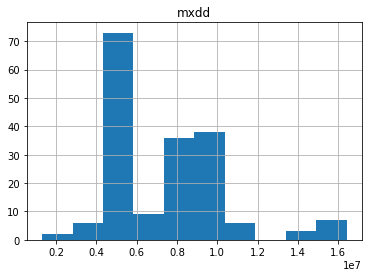

In [35]:
bigdf.hist('mxdd')

In [36]:
bigdf_filtered = bigdf.loc[bigdf['mxdd'] < 3.0e7].reset_index(drop=True)

In [37]:
bigdf_filtered

,lookback,thres,sell_thres,cusum,returns,drawdowns,sharpe,mxdd
0,4500,3.2,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13594, 0.00748, -0.07305, -0.02474, 0.04631...","[10115580, 204660, 282360, 349500, 301980, 237...",5.014912,10115580.0
1,4500,3.2,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.17387, 0.01452, -0.07264, -0.02162, 0.05117...","[9460320, 204600, 398160, 301680, 300780, 2391...",5.580092,9460320.0
2,4500,3.2,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.10282, 0.01452, -0.06946, -0.01994, 0.053, ...","[9444540, 204420, 174660, 2314080, 922920, 113...",5.880504,9444540.0
3,4500,3.2,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0698, 0.01452, -0.06946, -0.01886, 0.053, 0...","[9661440, 197160, 316740, 282600, 2310120, 113...",5.015778,9661440.0
4,4500,3.2,0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.07462, 0.01452, -0.07963, -0.01797, -0.0605...","[9646380, 197040, 1157880, 2301960, 710940, 12...",5.042959,9646380.0
...,...,...,...,...,...,...,...,...
175,5250,4.8,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.06277, 0.06981, -0.00115, 0.05714, 0.03415...","[4640340, 1605900, 401940, 788340, 2666880, 88...",7.313693,4640340.0
176,5250,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05936, 0.07363, -0.00115, 0.0649, 0.04707,...","[4639920, 1622280, 340080, 788220, 2658540, 88...",7.606606,4639920.0
177,5250,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0791, 0.09238, -0.01193, 0.07014, 0.04707,...","[4626480, 1622280, 337260, 788220, 2657880, 86...",7.519992,4626480.0
178,5250,4.8,0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.07051, 0.09238, -0.01193, 0.07014, 0.04903...","[4624920, 1622280, 216840, 552300, 2656140, 10...",6.835065,4624920.0


In [ ]:
b = pd.read_csv("../data/generated/results/ARDR-LSK-preliminary.csv")

In [61]:
a = b[b.lookback == 5000]

In [62]:
a = a[a.sell_thres == 0.]

In [63]:
a = a[["thres", "sharpe"]]

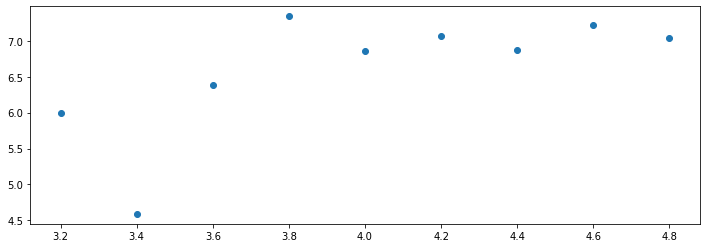

In [64]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x=a.thres, y=a.sharpe)

In [38]:
bigdf_result = bigdf_filtered.nlargest(10,'sharpe')

In [42]:
bigdf_filtered.to_csv("../data/generated/results/test.csv")

In [39]:
bigdf_filtered.drop(["cusum"], axis=1, inplace=True)
bigdf_filtered.to_csv("../data/generated/results/test.csv")

,lookback,thres,sell_thres,cusum,returns,drawdowns,sharpe,mxdd
86,4750,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05399, 0.09238, 0.00018, 0.05016, 0.0888, ...","[4641060, 1804800, 525060, 2670660, 1400400, 6...",7.789063,4641060.0
126,5000,4.6,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.06575, 0.04152, -0.02649, 0.07363, -0.0011...","[4639920, 1606080, 340440, 488340, 2666640, 90...",7.718890,4639920.0
131,5000,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05992, 0.07363, 0.00018, 0.05786, 0.04707,...","[4639920, 340440, 488340, 2666640, 903780, 67620]",7.635782,4639920.0
176,5250,4.8,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05936, 0.07363, -0.00115, 0.0649, 0.04707,...","[4639920, 1622280, 340080, 788220, 2658540, 88...",7.606606,4639920.0
87,4750,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05928, 0.09238, -0.01063, 0.04873, 0.0888,...","[4639980, 1605900, 1743360, 505080, 2659680, 1...",7.545852,4639980.0
177,5250,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0791, 0.09238, -0.01193, 0.07014, 0.04707,...","[4626480, 1622280, 337260, 788220, 2657880, 86...",7.519992,4626480.0
42,4500,4.8,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05928, 0.04326, 0.09238, -0.01063, 0.05016...","[4639980, 1605780, 1804800, 531600, 2670660, 4...",7.498027,4639980.0
85,4750,4.8,-0.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.06302, 0.07363, 0.00018, 0.04872, 0.07806,...","[4646460, 1809360, 534840, 2671980, 740640]",7.478183,4646460.0
76,4750,4.4,-0.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05848, 0.03898, -0.03646, 0.09238, -0.0011...","[4641060, 1605840, 401940, 525060, 2670660, 15...",7.476651,4641060.0
37,4500,4.6,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.05928, 0.04518, -0.03926, 0.09238, -0.0106...","[4639980, 1605780, 401940, 204420, 531600, 267...",7.405942,4639980.0


In [ ]:
bigdf_filtered.drop(["cusum"], axis=1, inplace=True)
bigdf_filtered.to_csv("../data/generated/results/test.csv")

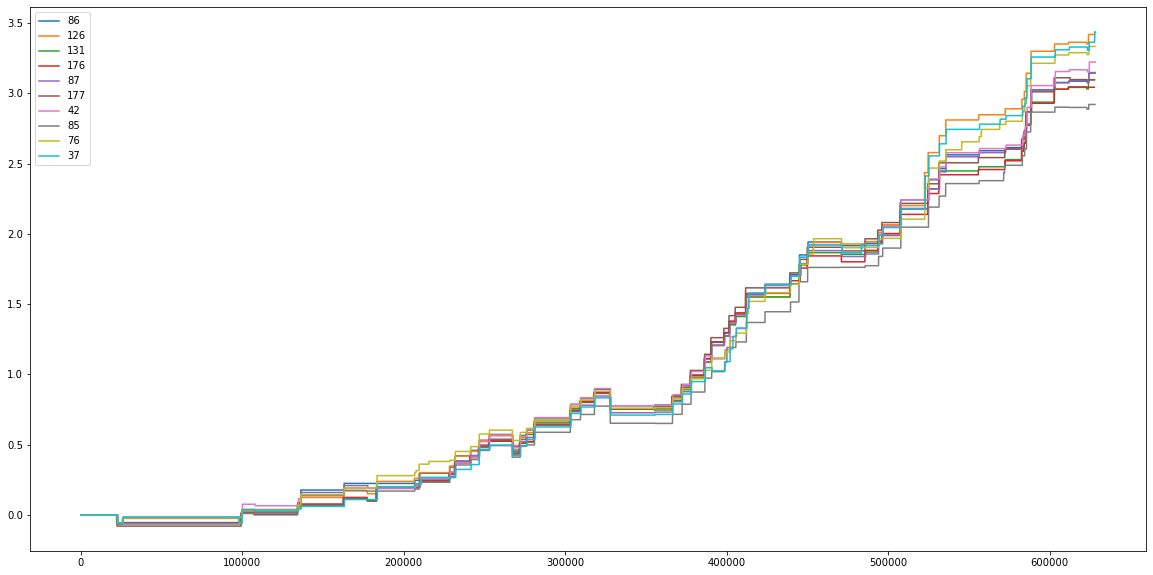

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
for index, row in bigdf_result.iterrows():
    pd.Series(row['cusum']).plot(legend=True)
ax.legend(bigdf_result.index)
# fig.savefig('../data/generated/preliminary.png') #For first round
fig.savefig('../data/generated/final.png') #For final round

In [19]:
bigdf_filtered.to_csv("../data/generated/results/ARDR-LSK-preliminary.csv")

In [141]:
for index, row in bigdf_result.iterrows():
    ret = row['returns']
    print(index)
    print(np.sqrt(len(ret)) * np.nanmean(ret) / np.nanstd(ret))

99
1.7144523701359085
223
1.3743058865378712
347
1.8594478613602894
471
2.1280851014235
595
5.472205487597502
719
5.083683363605593
843
5.929368069009028
98
1.7707864611644295
222
0.8649171037960948
346
0.9021308359593915


### Anything Else

(Basically like the sharpe ratio, but using params other than returns)

In [27]:
# list to base std off of (ex. for avg daily return, would be list of daily returns.
# for max drawdown length, would be list of drawdown lengths)
raw_value_list = ret

#the raw value of the t-stat to test
raw_value = np.nanmean(ret)

#the null hypothesis value
null_hypothesis = 0 

print('Average Daily Returns = %f' % raw_value)

Average Daily Returns = 0.027455


In [29]:
t_stat = (raw_value - null_hypothesis) / np.nanstd(raw_value_list)
print(t_stat)

0.4123370454656365


In [37]:
1 - st.norm.cdf(t_stat)

0.3400461996725078

In [34]:
st.norm.sf(abs(t_stat))

0.3400461996725078

In [32]:
# Finding Critical Values
# dof (degrees of freedom) is pretty much just a fancy way of saying n-1, (n=number of values in distribution)
# theoretically infinite, since we are using a hypothetical gaussian distribution
dof = 1000

print(st.t.ppf(q=1-(0.1),df=dof))
print(st.t.ppf(q=1-(0.05),df=dof))
print(st.t.ppf(q=1-(0.01),df=dof))
print(st.t.ppf(q=1-(0.001),df=dof))


1.2823987214609247
1.6463788172854639
2.3300826747555097
3.0984021639128754


## Monte Carlo

### Monte Carlo Returns

In [ ]:
# The metric to use to measure the input data
# for "predict the market" strategies, can be close price or market returns
# can use z-score for this strategy
zscore_metric = spread.zscore

#daily returns of strategy
#ret

In [ ]:
skew_, loc_, scale_ = st.pearson3.fit(zscore_metric)
num_better_samples = 0

In [42]:
sample_size = 10000
ret_sims = []

for sample in tqdm(range(sample_size)):
    zscore_sim = st.pearson3.rvs(skew=skew_, loc=loc_, scale=scale_, size=zscore_metric.shape[0], random_state=sample)
    
    spread_sim = spread
    spread_sim['zscore'] = zscore_sim
    
    _, _, _, _, ret_sim, _ = run_backtest(spread_sim, 2.0, 0.)[0]
    ret_sims.append(ret_sim)
    
    if (np.mean(ret_sim) >= np.mean(ret)):
        num_better_samples += 1
            
print("Randomized zscore: p-value = %f" % (num_better_samples / sample_size))

  0%|          | 0/10000 [00:00<?, ?it/s]


NameError: name 'skew_' is not defined

## Randomized Entry Test

### Randomized Entry Returns

In [ ]:
num_better_samples = 0

In [ ]:
sample_size = 10000
ret_sims = []

for sample in tqdm(range(sample_size)):
    long_a_sim = long_a.shuffle()
    long_b_sim = long_b.shuffle() 
    
    ret_sim = run_fake_backtest(spread, long_a_sim, long_b_sim, 1.5, 5)[0]
    ret_sims.append(ret_sim)
    
    if (np.mean(ret_sim) >= np.mean(ret)):
        num_better_samples += 1

print("Randomized Entry: p-value = %f" % (num_better_samples / sample_size))

In [ ]:
def get_a_b(al, ac, ah, bl, bc, bh):
    return ac-abs(ac-al)/2, ac+abs(ac-ah)/2, bc-abs(bc-bl)/2, bc+abs(bc-bh)/2

def run_fake_backtest(spread, long_a_sim, long_b_sim, thres, sell_thres, fee=0.002, interest=0.002):
    total, p_total = 0, 0 #Previous total
    cusum, returns = [], []
    price_a, price_b, long = None, None, None #Values: None, "A", "B"
    long_a, long_b, liquidate,  dd_indices= [], [], [], [] #Drawdown indicies
    dd_i = True
    
    for i in range(spread.shape[0]):
        al, ah, bl, bh = get_a_b(spread.Al[i], spread.A[i], spread.Ah[i], spread.Bl[i], spread.B[i], spread.Bh[i])
        
        if i in long_a_sim: # Looking to buy
            price_a = ah
            price_b = bl
            long = "A"
            long_a.append(spread.index[i])
            
        elif i in long_b_sim:
            price_a = al
            price_b = bh
            long = "B"
            long_b.append(spread.index[i])
            
        elif (long == "A" and (i in long_b_sim)) or (long == "B" and (i in long_a_sim)): #Liquidate positions
            al, ah, bl, bh = get_a_b(spread.Al[i], spread.A[i], spread.Ah[i], spread.Bl[i], spread.B[i], spread.Bh[i])
            gain = 0
            if long=="A":
                gain = liquidate_assets(price_b, bh, al, price_a, fee, long_a[-1], spread.index[i], interest)
            else:
                gain = liquidate_assets(price_a, ah, bl, price_b, fee, long_b[-1], spread.index[i], interest)
            returns.append(gain)
            total += gain
            price_a, price_b, long = None, None, None
            liquidate.append(spread.index[i])
        cusum.append(total)
        

        if total < p_total:
            if dd_i:
                dd_indices.append(spread.index[i])
                dd_i = False
        else:
            if not dd_i:
                dd_indices.append(spread.index[i])
                dd_i = True
            p_total = total
    if total < p_total:
        dd_indices.append(spread.index[i])
    drawdowns = get_drawdowns(dd_indices)
    return long_a, long_b, liquidate, cusum, returns, drawdowns
        
def liquidate_assets(x1, x2, y1, y2, fee, d1, d2, interest):
    interest = ((d2-d1).days + 1) * interest
    total = (x1 - x2)/x1 - 2*fee - interest
    total += (y1 - y2)/y1 - 2*fee - interest
    return total

def get_drawdowns(dd_indices):
    a = dd_indices[1::2]
    b = dd_indices[::2]
    a = np.array(a)
    b = np.array(b[:len(a)])
    c = a-b
    c.sort()
    return c[::-1]